In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test)= datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

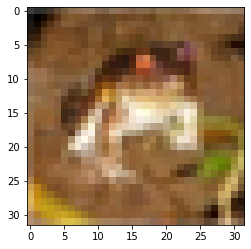

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)

In [8]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test= y_test.reshape(-1,)

In [10]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X, y, index):
 plt.figure(figsize = (15,2))
 plt.imshow(X[index])
 plt.xlabel(classes[y[index]])

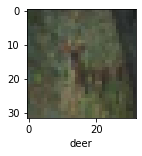

In [13]:
plot_sample(X_train, y_train, 10)

In [14]:
X_train=X_train/255.0
X_test=X_test/255.0

In [15]:
ann=models.Sequential([
 layers.Flatten(input_shape=(32,32,3)),
 layers.Dense(3000,activation='relu'),
 layers.Dense(1000,activation='relu'),
 layers.Dense(10,activation='sigmoid'),   
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.8140 - accuracy: 0.3559
Epoch 2/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.6230 - accuracy: 0.4284
Epoch 3/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.5441 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.4826 - accuracy: 0.4768
Epoch 5/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.4328 - accuracy: 0.4989


In [16]:
from sklearn.metrics import confusion_matrix , classification_report

In [17]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

In [18]:
print("Classification Report: \n",classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.49      0.53      1000
           1       0.64      0.57      0.60      1000
           2       0.41      0.33      0.36      1000
           3       0.32      0.42      0.36      1000
           4       0.45      0.41      0.43      1000
           5       0.38      0.36      0.37      1000
           6       0.49      0.59      0.53      1000
           7       0.58      0.53      0.55      1000
           8       0.54      0.71      0.61      1000
           9       0.60      0.52      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [23]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [24]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4493 - accuracy: 0.4816
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1001 - accuracy: 0.6143
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9777 - accuracy: 0.6597
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8925 - accuracy: 0.6900
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8253 - accuracy: 0.7132
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7694 - accuracy: 0.7335
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7245 - accuracy: 0.7477
Epoch 8/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6747 - accuracy: 0.7637
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6364 - accuracy: 0.7772
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [25]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9298 - accuracy: 0.7008


[0.9297646284103394, 0.7008000016212463]

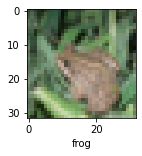

In [26]:
plot_sample(X_test, y_test, 4)